Wskaźnik newsów - GRUPA AZOTY
=========================

Notowanie
---------------

In [2]:
import share_price as sp
import plot_helper as ph
%matplotlib inline
data =sp.getLastWeekIntraday('GRUPAAZOTY','20190520','20190525')    
                     


Analiza Twittów
----------------------

In [10]:
from twitt_processing import TwittProcessing
from twitter import Twitt
twp= TwittProcessing()

twp. KeyWords= { 'GRUPAAZOTY':{
                    'search': ['azoty'],
                    'ignore':['sponsor'],
                    'sentiment':{
                        'kuluary':-1,
                        'dziwny':-1,
                        'Rosjanin':-1,
                        'rosyjski':-1,                        
                        'oskarżyć':-1,
                        'lepsza':1,
                        'w ciemno':1,
                        'wielki dzień':1,
                        'kontrakt':1,
                        'umowa':1,
                        'porozumienie':1,
                        'historia':1,
                        'pierwszy':1,
                        'wpisać':1,
                        'przedłużyć':1,
                        'zabezpieczyć':1,
                        'zbudują':1,
                        'podrożały':1,
                        'zbudować':1
                        }
                    }
               }

twt =  twp.indicator('GRUPAAZOTY','20190520','20190525')
twt_f = list(filter(lambda x: not x.ignore and x.power>10000 and x.sentiment==0 ,twt))
twt_f.sort(key=lambda x: x.power, reverse=True)
for t in twt_f:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
    print('-------------------------------------------------------------------------')
    print(t.text)
    print('-------------------------------------------------------------------------')
    print(t.tokens)


379298 [] 2019-05-23 18:16:02 Ryszard Petru
-------------------------------------------------------------------------
RT @RGwiazdowski: Przypomnę nieśmiało, że właścicielem Grupy Azoty i PKN Orlen, który jest właścicielem Anwilu jest jeden i ten sam Skarb P…
-------------------------------------------------------------------------
RT @ RGwiazdowski : przypomnieć nieśmiało , że właściciel grupa azot I PKN orleń , który być właściciel Anwil być jeden I ten ŚAM skarbić P… 
192688 [] 2019-05-20 20:06:33 Przegląd Sportowy
-------------------------------------------------------------------------
Azoty bez Cadenasa. Wybrał ofertę Ademaru Leon https://t.co/1vGtHvL0X9
-------------------------------------------------------------------------
azot beza Cadenasa . wybrać oferta Ademaru León https : //t.co/1vGtHvL0X9 
145745 [] 2019-05-23 18:39:25 Elzbieta Z💯🇵🇱🇪🇺
-------------------------------------------------------------------------
RT @RGwiazdowski: Przypomnę nieśmiało, że właścicielem Grupy Az

Wykres pokazujacy powiazanie miedzy cenami akcji a sentymentem twittów
------------------------------------------------------------------------------------------------------------

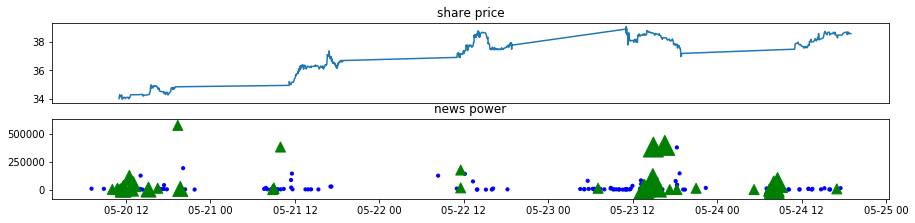

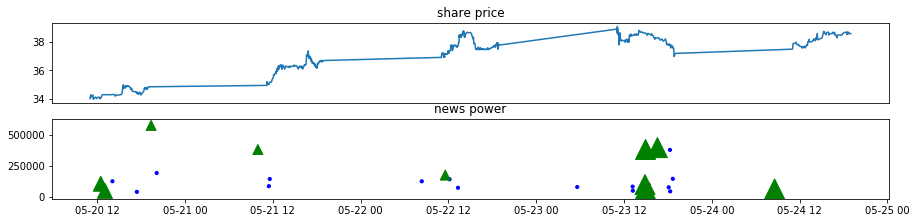

577570 ['zbudować'] 2019-05-20 19:21:17 Wojciech70
-------------------------------------------------------------------------
RT @wgospodarce: PGE i Grupa Azoty zbudują farmę fotowoltaiczną https://t.co/QdUvEP8FvL
-------------------------------------------------------------------------
RT @ wgospodarce : PGE I grupa azot zbudować farma fotowoltaiczny https : //t.co/QdUvEP8FvL 
397775 ['umowa', 'przedłużyć', 'zabezpieczyć'] 2019-05-23 16:33:17 krystyna✝️🇵🇱🇪🇺
-------------------------------------------------------------------------
RT @wjakobik: .@Grupa_Azoty przedłużyła umowę gazową z #PGNiG do 2022 roku. Polska spółka gazowa ma zabezpieczone dostawy warte 8 mld zł. Z…
-------------------------------------------------------------------------
RT @ wjakobik : . @ Grupa_Azoty przedłużyć umowa gazowy ż # PGNiG do 2022 rok . Polska spółka gazowy ma zabezpieczyć dostawa warta 8 mld zł . Z… 
382884 ['umowa', 'przedłużyć', 'zabezpieczyć'] 2019-05-23 14:55:53 MałgNakonieczny
--------------------

In [11]:
import plot_helper 
import datetime

twt_w = twt #list(filter(lambda x: not x.ignore and x.power>100000 and x.sentiment!=0 ,twt))
plot_helper.plot2(data,twt_w)


twt_w2 = list(filter(lambda x: x.power>40000 ,twt))
plot_helper.plot2(data,twt_w2)

twt_w2.sort(key=lambda x: x.power, reverse=True)
for t in twt_w2:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
    print('-------------------------------------------------------------------------')
    print(t.text)
    print('-------------------------------------------------------------------------')
    print(t.tokens)